In [1]:
import acquire as a

In [2]:
df = a.acquire_data()

## Preparation work

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# made column names pythonic
df.columns = [
    col.lower().replace(' ','_') for col in df.columns
]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    541909 non-null  object 
 1   stockcode    541909 non-null  object 
 2   description  540455 non-null  object 
 3   quantity     541909 non-null  int64  
 4   invoicedate  541909 non-null  object 
 5   unitprice    541909 non-null  float64
 6   customerid   406829 non-null  float64
 7   country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Why is there NaN values for customerid? is there a match for customer id and country?

In [7]:
rows_with_null = df[df.isna().any(axis=1)]
rows_with_null

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [8]:
columns_with_nulls = df.columns[df.isna().any(axis=0)]

In [9]:
columns_with_nulls

Index(['description', 'customerid'], dtype='object')

In [10]:
# Select rows where any of the specified columns have null values
rows_with_nulls = df[df[columns_with_nulls].isnull().any(axis=1)]

print("Rows with null values in specified columns:")
rows_with_nulls

Rows with null values in specified columns:


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [11]:
description_null = df[df['description'].isnull()]
description_null[description_null['customerid'].isnull()]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [12]:
rows_with_nulls_nan = rows_with_nulls.isna().sum()
rows_with_nulls_nan

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

# There are only nans within description and customer id

## Customerids aren't unique to each country in the dataset

In [13]:
df[['customerid','country']].value_counts()

customerid  country       
17841.0     United Kingdom    7983
14911.0     EIRE              5903
14096.0     United Kingdom    5128
12748.0     United Kingdom    4642
14606.0     United Kingdom    2782
                              ... 
14351.0     United Kingdom       1
15562.0     United Kingdom       1
17065.0     United Kingdom       1
15070.0     United Kingdom       1
14090.0     United Kingdom       1
Name: count, Length: 4380, dtype: int64

In [14]:
country_cnts = df.country.value_counts()
country_cnts = pd.DataFrame(country_cnts).reset_index()
country_cnts = country_cnts[country_cnts['count'] > 1000]

In [15]:
# plt.figure(figsize=(12, 8))

# sns.barplot(data=country_cnts, x='count', y='country', palette='bright')
# plt.title('Country Distribution')
# plt.ylabel('Country', rotation=0)
# plt.tight_layout()
# plt.show()

/var/folders/hz/r10rvhgs41x5bxdmg79hksdw0000gn/T/ipykernel_45914/3697237330.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=country_cnts, x='count', y='country', palette='bright')
/var/folders/hz/r10rvhgs41x5bxdmg79hksdw0000gn/T/ipykernel_45914/3697237330.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([label.get_text().upper() for label in ax.get_yticklabels()])


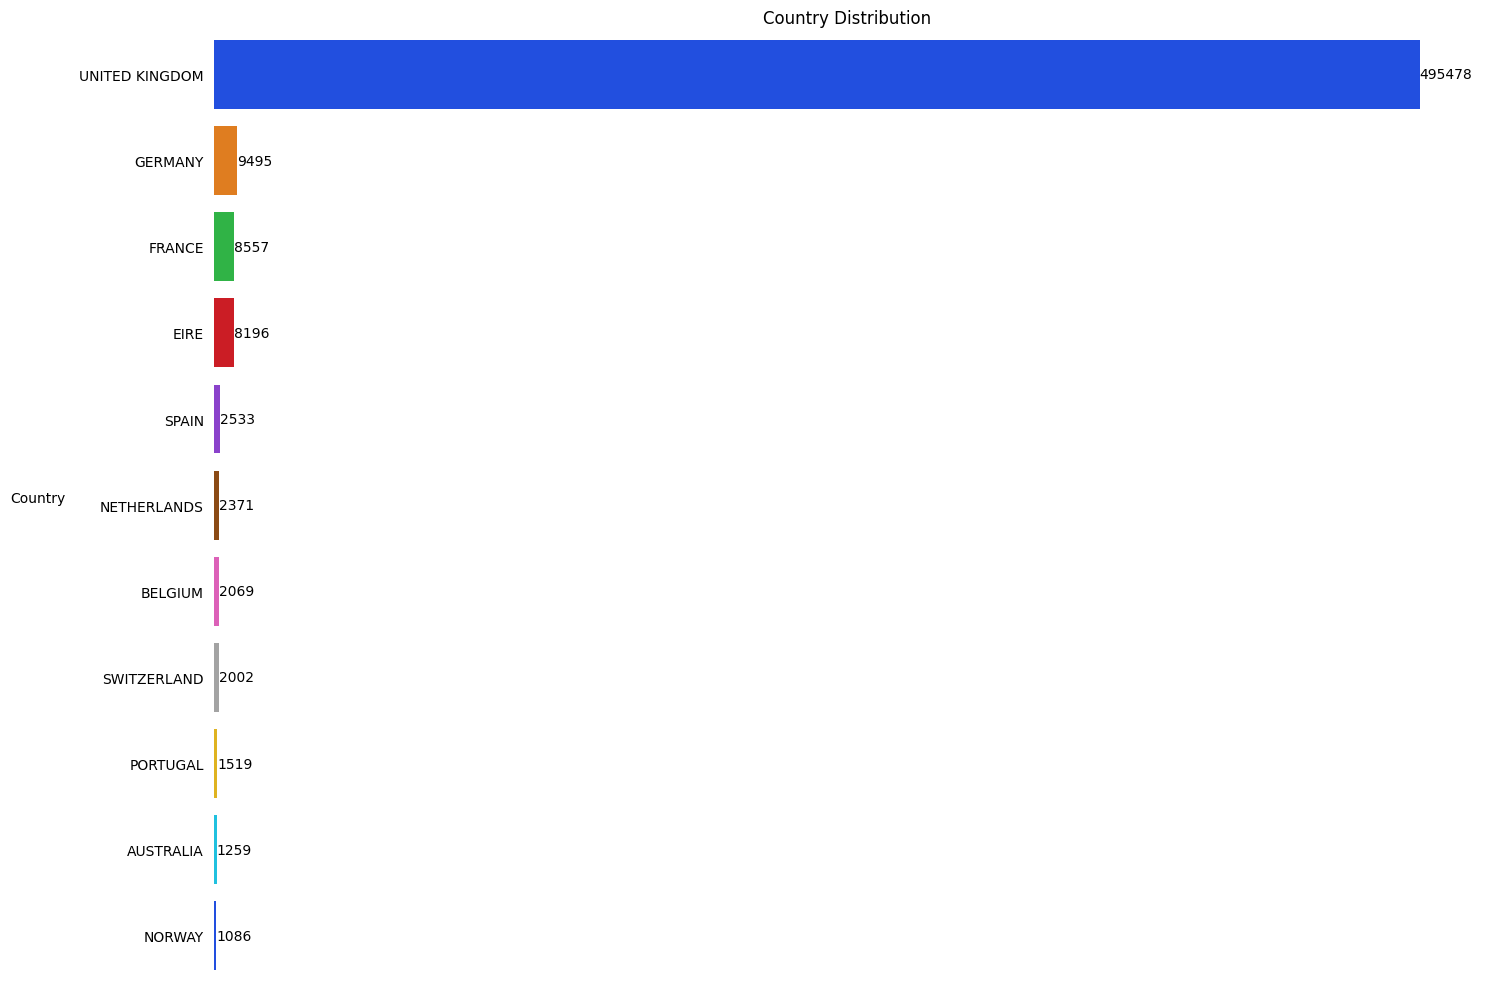

In [16]:
# set figsze
plt.figure(figsize=(15, 10))

# Create the bar plot
ax = sns.barplot(data=country_cnts, x='count', y='country', palette='bright')

# remove spines
sns.despine(left=True, bottom=True)

# adding values at the end of each bar
for p in ax.patches:
    
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

# Remove x-tick labels, keeping the ticks
ax.set_xticklabels([])
ax.set_xticks([])

# Remove y ticks
ax.tick_params(axis='y', which='both', left=False)
# ax.tick_params(axis='x', which='both', bottom=False, xlabel=None)

        
# set labels
plt.title('Country Distribution')

# capitalize the y-axis labels
ax.set_yticklabels([label.get_text().upper() for label in ax.get_yticklabels()])

plt.ylabel('Country', rotation=0, labelpad=30)
plt.xlabel('')
plt.tight_layout()
plt.show()

# Based on this visual we can see that all countries that appear over 1000X within this dataset

# what are the distributions that exist in this dataset?

In [11]:
numeric_cols = df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]

In [ ]:
# Create histograms for selected columns
for col in numeric_cols:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=df, x=col, bins=50)
    plt.show()

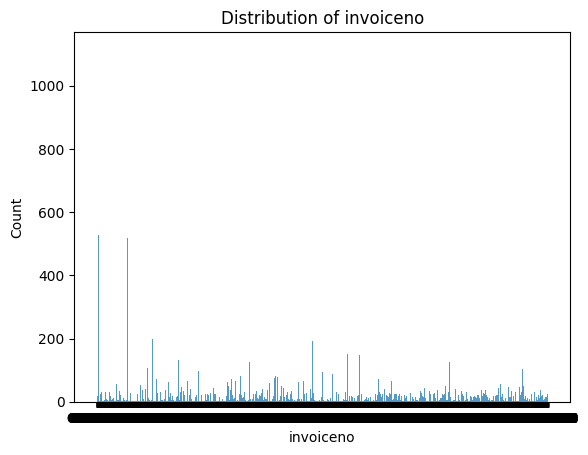

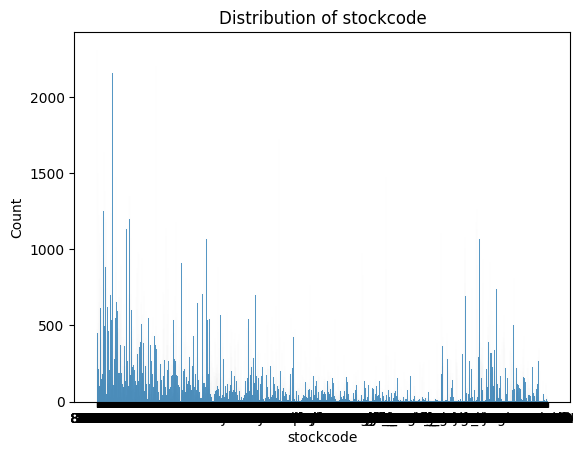

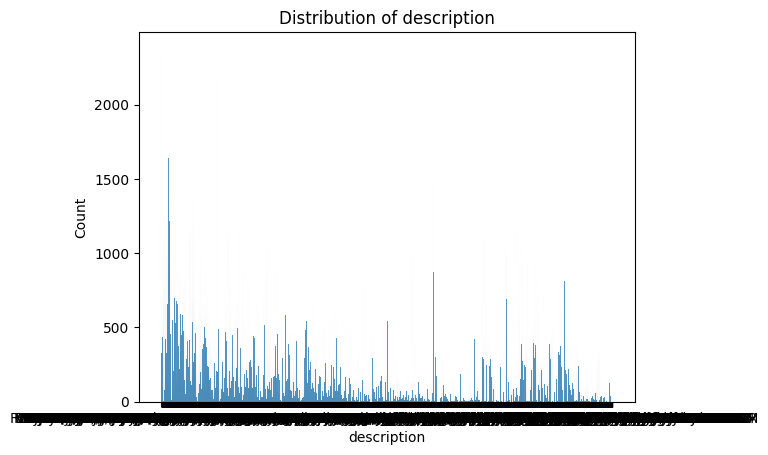

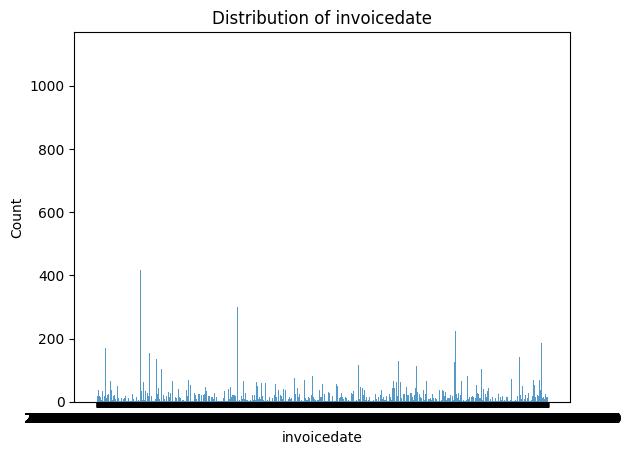

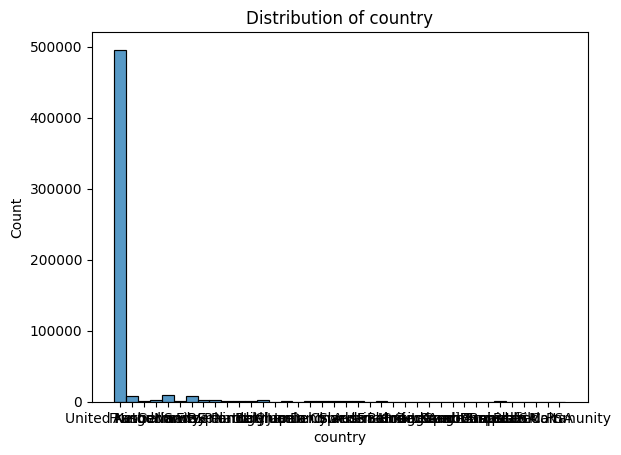

In [18]:
for col in df.columns[df.dtypes == 'object']:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=df, x=col)
    plt.show()

# the number of null values is 135080, is it worth trying to salvage this data?

In [19]:
541540 - 135808

405732

## This is 25% of the dataset

## what patterns or reasons are there for this missing data?, is there a way to impute or fill this with other info or infered based on context?

In [20]:
rows_with_nulls['country'].isnull().value_counts()

country
False    135080
Name: count, dtype: int64

In [21]:
rows_with_nulls

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [22]:
rows_nouk_nulls = rows_with_nulls[rows_with_nulls.country != 'United Kingdom']
rows_nouk_nulls

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
6353,536885,21832,CHOCOLATE CALCULATOR,24,2010-12-03 11:42:00,1.65,NaN,EIRE
6354,536885,21523,DOORMAT FANCY FONT HOME SWEET HOME,10,2010-12-03 11:42:00,6.75,NaN,EIRE
6355,536885,48184,DOORMAT ENGLISH ROSE,10,2010-12-03 11:42:00,6.75,NaN,EIRE
6356,536885,22837,HOT WATER BOTTLE BABUSHKA,24,2010-12-03 11:42:00,4.65,NaN,EIRE
6357,536885,22632,HAND WARMER RED RETROSPOT,12,2010-12-03 11:42:00,2.10,NaN,EIRE
...,...,...,...,...,...,...,...,...
518850,580124,23212,HEART WREATH DECORATION WITH BELL,12,2011-12-01 17:12:00,1.25,NaN,EIRE
518851,580124,23311,VINTAGE CHRISTMAS STOCKING,6,2011-12-01 17:12:00,2.55,NaN,EIRE
518852,580124,23312,VINTAGE CHRISTMAS GIFT SACK,8,2011-12-01 17:12:00,4.15,NaN,EIRE
518853,580124,22834,HAND WARMER BABUSHKA DESIGN,24,2011-12-01 17:12:00,2.10,NaN,EIRE


## I don't think we need unspecified countries.

In [23]:
rows_nouk_nulls.country.value_counts()

country
EIRE           711
Hong Kong      288
Unspecified    202
Switzerland    125
France          66
Israel          47
Portugal        39
Bahrain          2
Name: count, dtype: int64

## how do unique values help here?

In [24]:
rows_nouk_nulls.nunique()

invoiceno       73
stockcode      735
description    742
quantity        50
invoicedate     73
unitprice       73
customerid       0
country          8
dtype: int64

## UK is comprised of so many nulls
- would it add value to the data evaluation if there are observations with a unit price of 0.0?

In [25]:
zero_unitprice_rows = rows_with_nulls.loc[rows_with_nulls['description'].isnull() & (rows_with_nulls['unitprice'] == 0.0)]
print(zero_unitprice_rows.country.value_counts())
zero_unitprice_rows

country
United Kingdom    1454
Name: count, dtype: int64


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


## checking quantity and customer_ids

In [26]:
quantity_custid_rows = rows_with_nulls.loc[rows_with_nulls['customerid'].isnull() & (rows_with_nulls['quantity'] > 0)]
print(quantity_custid_rows.country.value_counts())
quantity_custid_rows

country
United Kingdom    131941
EIRE                 656
Hong Kong            284
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                1
Name: count, dtype: int64


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


## are there mixed nan and actual values for invoiceno and customerid?

In [27]:
inv_cust_df = df[['invoiceno', 'customerid']]
inv_cust_df = inv_cust_df.loc[inv_cust_df['customerid'].notna() & inv_cust_df['invoiceno'].isna()]
inv_cust_df

,invoiceno,customerid


## No there is not

In [28]:
result = df[df.duplicated('invoiceno', keep=False)]

In [29]:
result

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [30]:
nan_check = result.isna().any()

In [31]:
nan_check

invoiceno      False
stockcode      False
description    False
quantity       False
invoicedate    False
unitprice      False
customerid      True
country        False
dtype: bool

In [32]:
nan_count = result.isna().sum()

In [33]:
nan_count

invoiceno           0
stockcode           0
description         0
quantity            0
invoicedate         0
unitprice           0
customerid     132634
country             0
dtype: int64

In [34]:
# Identify NaN values in the result DataFrame
nan_mask = result['customerid'].isna()

# Display the DataFrame with NaN values identified
result_with_nans = result[nan_mask]
result_with_nans

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [35]:
# Check for duplicates based on 'InvoiceNo' and 'CustomerID'
duplicates = df[df.duplicated(subset=['invoiceno', 'customerid'], keep=False)]

# Filter for 'InvoiceNo' observations with both valid and NaN 'CustomerID' values
result = duplicates.groupby('invoiceno').filter(lambda x: x['customerid'].notna().any() and x['customerid'].isna().any())

result

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country


In [36]:
rows_with_nulls.description.value_counts()

description
DOTCOM POSTAGE                       693
JUMBO BAG RED RETROSPOT              497
JUMBO STORAGE BAG SUKI               414
JUMBO SHOPPER VINTAGE RED PAISLEY    388
JUMBO BAG WOODLAND ANIMALS           372
                                    ... 
EAU DE NILE JEWELLED PHOTOFRAME        1
WHITE VINTAGE CRYSTAL BRACELET         1
RUBY GLASS NECKLACE 42"                1
PURPLE LAS VEGAS BRACELET ROUND        1
BLUE LEAVES AND BEADS PHONE CHARM      1
Name: count, Length: 3554, dtype: int64

In [37]:
rows_with_nulls.description.to_list

<bound method IndexOpsMixin.tolist of 622                                   NaN
1443      DECORATIVE ROSE BATHROOM BOTTLE
1444      DECORATIVE CATS BATHROOM BOTTLE
1445                   POLKADOT RAIN HAT 
1446                RAIN PONCHO RETROSPOT
                       ...               
541536            JUMBO BAG RED RETROSPOT
541537     JUMBO  BAG BAROQUE BLACK WHITE
541538      LADIES & GENTLEMEN METAL SIGN
541539                  S/4 CACTI CANDLES
541540                     DOTCOM POSTAGE
Name: description, Length: 135080, dtype: object>

# After investigating and exploring nulls, i have come to a conclusion, that imputing null values or renaming them with a marker of none or no info to account for nans that exist in the data

In [1]:
import acquire as a

df = a.acquire_data()
df.columns = [
    col.lower().replace(' ','_') for col in df.columns
]

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    541909 non-null  object 
 1   stockcode    541909 non-null  object 
 2   description  540455 non-null  object 
 3   quantity     541909 non-null  int64  
 4   invoicedate  541909 non-null  object 
 5   unitprice    541909 non-null  float64
 6   customerid   406829 non-null  float64
 7   country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [81]:
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
#DataFrame with NaNs filled in the 'description' and 'customerid' column
df = df.copy()
df['description'].fillna('no description', inplace=True)

df = df.copy()
df['customerid'].fillna(0, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    541909 non-null  object 
 1   stockcode    541909 non-null  object 
 2   description  541909 non-null  object 
 3   quantity     541909 non-null  int64  
 4   invoicedate  541909 non-null  object 
 5   unitprice    541909 non-null  float64
 6   customerid   541909 non-null  float64
 7   country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## I will now view dsitributions after filling null values.

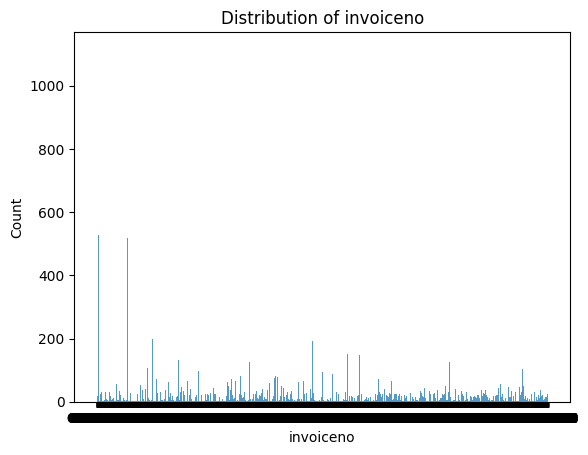

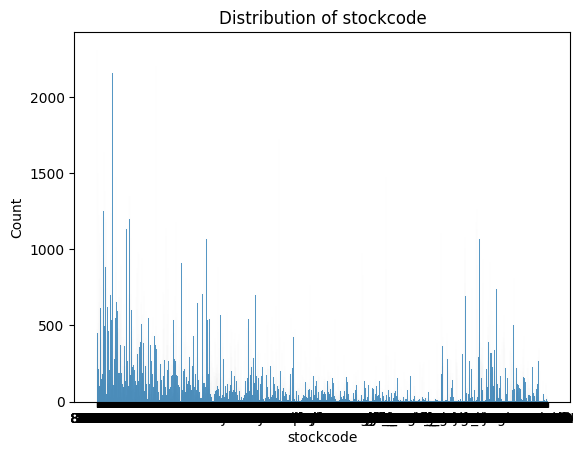

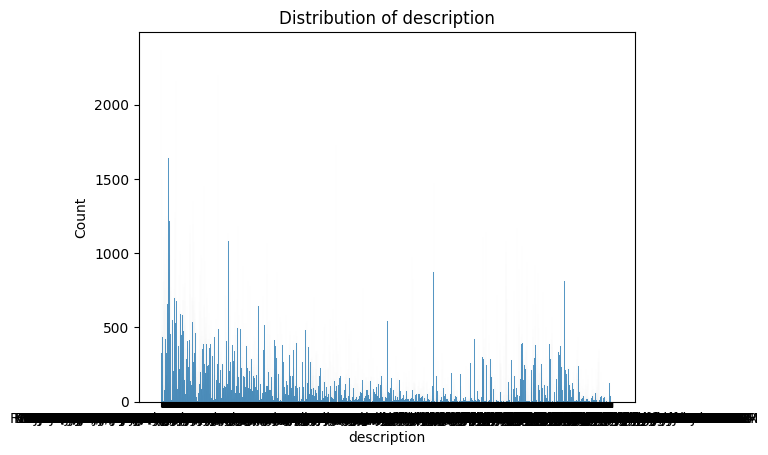

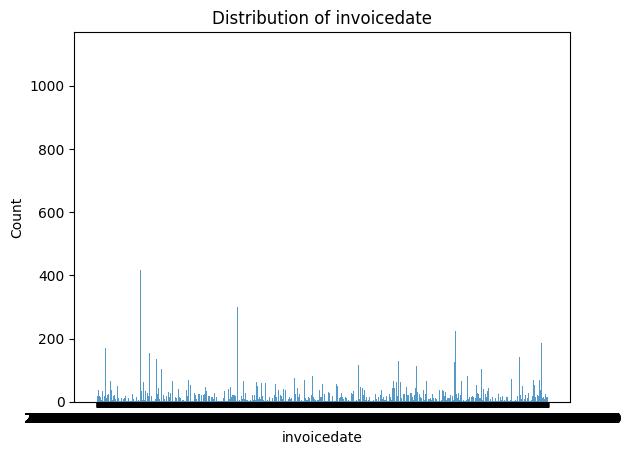

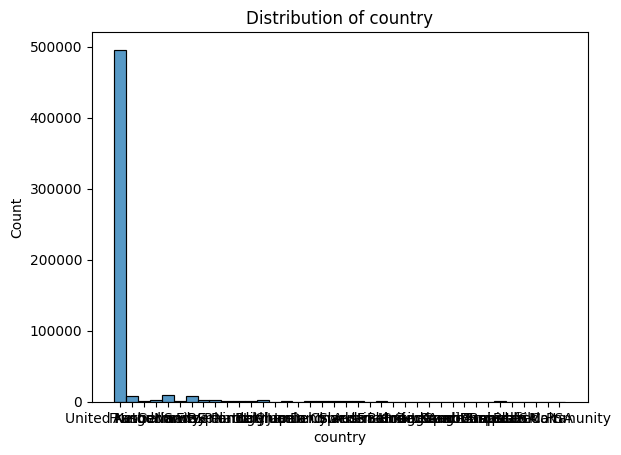

In [43]:
for col in df.columns[df.dtypes == 'object']:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=df, x=col)
    plt.show()

# How should I handle the outliers here?

In [84]:
df['quantity'].nlargest(10)

540421    80995
61619     74215
502122    12540
74614      5568
421632     4800
206121     4300
220843     4000
97432      3906
270885     3186
52711      3114
Name: quantity, dtype: int64

In [85]:
df['quantity'].nsmallest(10)


540422   -80995
61624    -74215
225529    -9600
225530    -9600
4287      -9360
225528    -9058
115818    -5368
431381    -4830
341601    -3667
323458    -3167
Name: quantity, dtype: int64

In [86]:
df['unitprice'].nlargest(10)

222681    38970.00
524602    17836.46
43702     16888.02
43703     16453.71
15016     13541.33
15017     13541.33
16356     13541.33
16232     13474.79
524601    11586.50
299982    11062.06
Name: unitprice, dtype: float64

In [87]:
df['unitprice'].nsmallest(10)

299983   -11062.06
299984   -11062.06
622           0.00
1970          0.00
1971          0.00
1972          0.00
1987          0.00
1988          0.00
2024          0.00
2025          0.00
Name: unitprice, dtype: float64

## Negative values may represent a refund in this dataset, i'm going to use a boolean mask to remove outliers

In [4]:
# Create a boolean mask for outliers in 'quantity'
quantity_outlier_mask = (df['quantity'] < -9600) | (df['quantity'] > 6000)

# Apply the mask to filter out outliers
df = df[~quantity_outlier_mask]

In [5]:
# Create a boolean mask for outliers in 'unitprice'
unitprice_outlier_mask = (df['unitprice'] < 0) | (df['unitprice'] > 20000)

# Apply the mask to filter out outliers
df = df[~unitprice_outlier_mask]

In [50]:
# df['quantity'].nlargest(10)

In [51]:
# df['quantity'].nsmallest(10)

In [52]:
# df['unitprice'].nlargest(10)

In [53]:
# df['unitprice'].nsmallest(100)

<!-- ## Boolean masked out outliers; removed 8 unique values from dataset-->

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541901 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    541901 non-null  object 
 1   stockcode    541901 non-null  object 
 2   description  541901 non-null  object 
 3   quantity     541901 non-null  int64  
 4   invoicedate  541901 non-null  object 
 5   unitprice    541901 non-null  float64
 6   customerid   541901 non-null  float64
 7   country      541901 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


 # I noticed that there is alot of customer_ids and unitprice that may correlate 

In [ ]:
for col in numeric_cols:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=df, x=col, bins=30)  # Adjust the number of bins as needed
    plt.show()

C:\tools\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\tools\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\tools\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\tools\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use

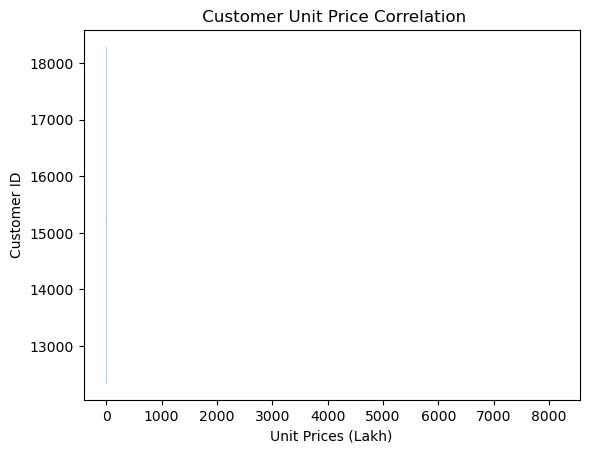

In [49]:
# I am going to see if there is a correlation between unitprice and customerid:
sns.histplot(data = df, x = 'unitprice', y = 'customerid')
plt.xlabel('Unit Prices (Lakh)')
plt.ylabel('Customer ID')
plt.title(' Customer Unit Price Correlation')
plt.show()

In [14]:
# removing 0.0 prices and associated customer id
df = df.copy()
df = df[df['unitprice'] != 0]

df = df.copy()
df = df[df['customerid'] != 0]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406784 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    406784 non-null  object 
 1   stockcode    406784 non-null  object 
 2   description  406784 non-null  object 
 3   quantity     406784 non-null  int64  
 4   invoicedate  406784 non-null  object 
 5   unitprice    406784 non-null  float64
 6   customerid   406784 non-null  float64
 7   country      406784 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


# Now I will see the data with no unitprices and customerids with zeros:

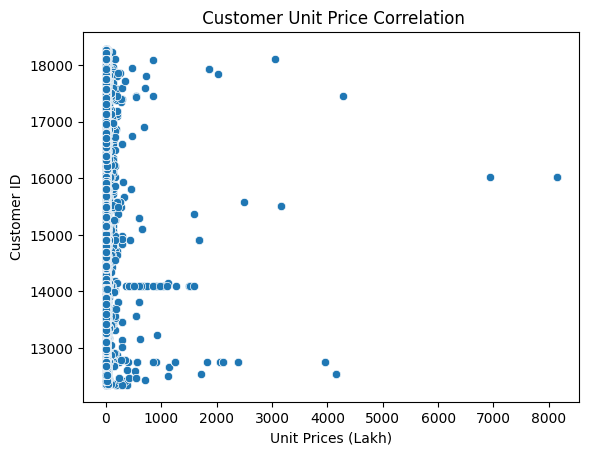

In [104]:
# I am going to see if there is a correlation between unitprice and customerid:
sns.scatterplot(data = df, x = 'unitprice', y = 'customerid')
plt.xlabel('Unit Prices (Lakh)')
plt.ylabel('Customer ID')
plt.title(' Customer Unit Price Correlation')
plt.show()

In [93]:
unitprices = df['unitprice'].value_counts()
unitprices

unitprice
1.25      46555
1.65      37503
2.95      27211
0.85      26396
0.42      22032
          ...  
5.32          1
3.56          1
4.37          1
6.89          1
224.69        1
Name: count, Length: 618, dtype: int64

C:\tools\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\tools\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


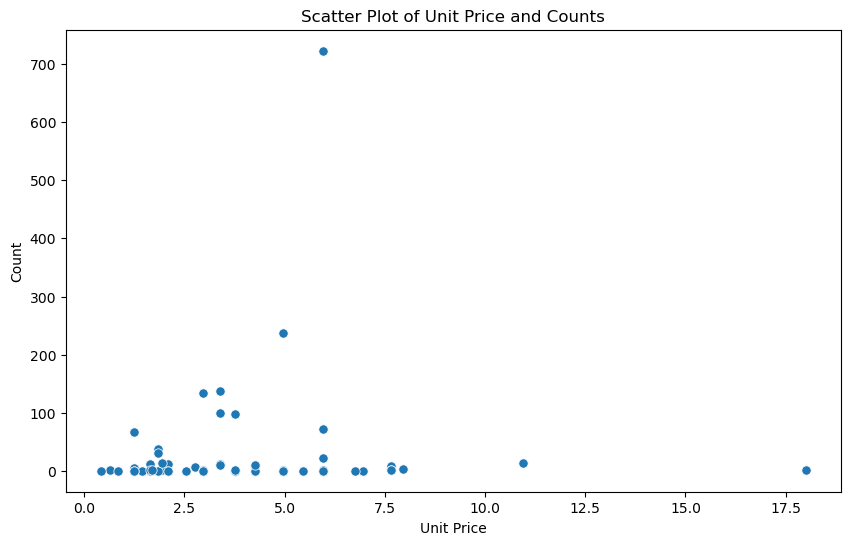

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='unitprice', y=df['unitprice'].value_counts(), s=45)
plt.title('Scatter Plot of Unit Price and Counts')
plt.xlabel('Unit Price')
plt.ylabel('Count')
plt.show()

C:\tools\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\tools\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


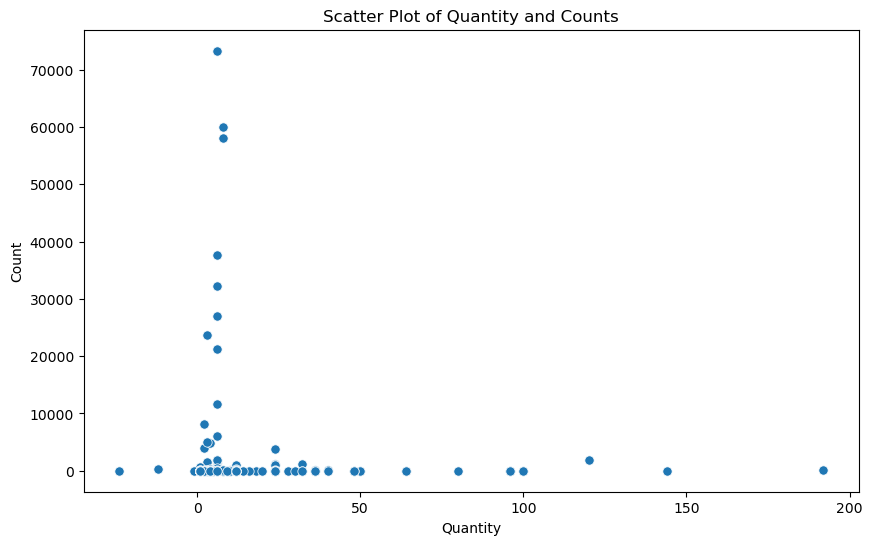

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='quantity', y=df['quantity'].value_counts(), s=45)
plt.title('Scatter Plot of Quantity and Counts')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

## we can see mean and where the dsitribution of values are

## one thing to note here is that the dataset, derived from kaggle, column "unitprice" is represented in lakh, i went ahead and converted the unit price so i can better understand the prices listed within this dataset.x

In [19]:
df.describe()

,quantity,unitprice,customerid
count,406784.000000,406784.000000,406784.000000
mean,12.028509,3.365038,15287.805066
std,46.204393,32.748004,1713.569229
min,-9360.000000,0.001000,12347.000000
25%,2.000000,1.250000,13954.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,4800.000000,8142.750000,18287.000000


In [ ]:
# # Define the conversion factor from lakh to dollars
# conversion_factor = 100000  # 1 lakh = 100,000

# # Convert the "unitprice" column to US dollars and replace the original column
# df['us_currency'] = (df['unitprice'] * conversion_factor).astype(float)

In [ ]:
df.drop(columns='us_currency', inplace=True)
df.head()

In [45]:
df['us_currency'].value_counts()

us_currency
125000.0      46555
165000.0      37503
295000.0      27211
85000.0       26396
42000.0       22032
              ...  
532000.0          1
356000.0          1
437000.0          1
689000.0          1
22469000.0        1
Name: count, Length: 618, dtype: int64

In [47]:
unitprice_mean_uscurrency = df.us_currency.mean()
unitprice_mean_uscurrency

336503.82610918814

C:\tools\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\tools\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\tools\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\tools\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


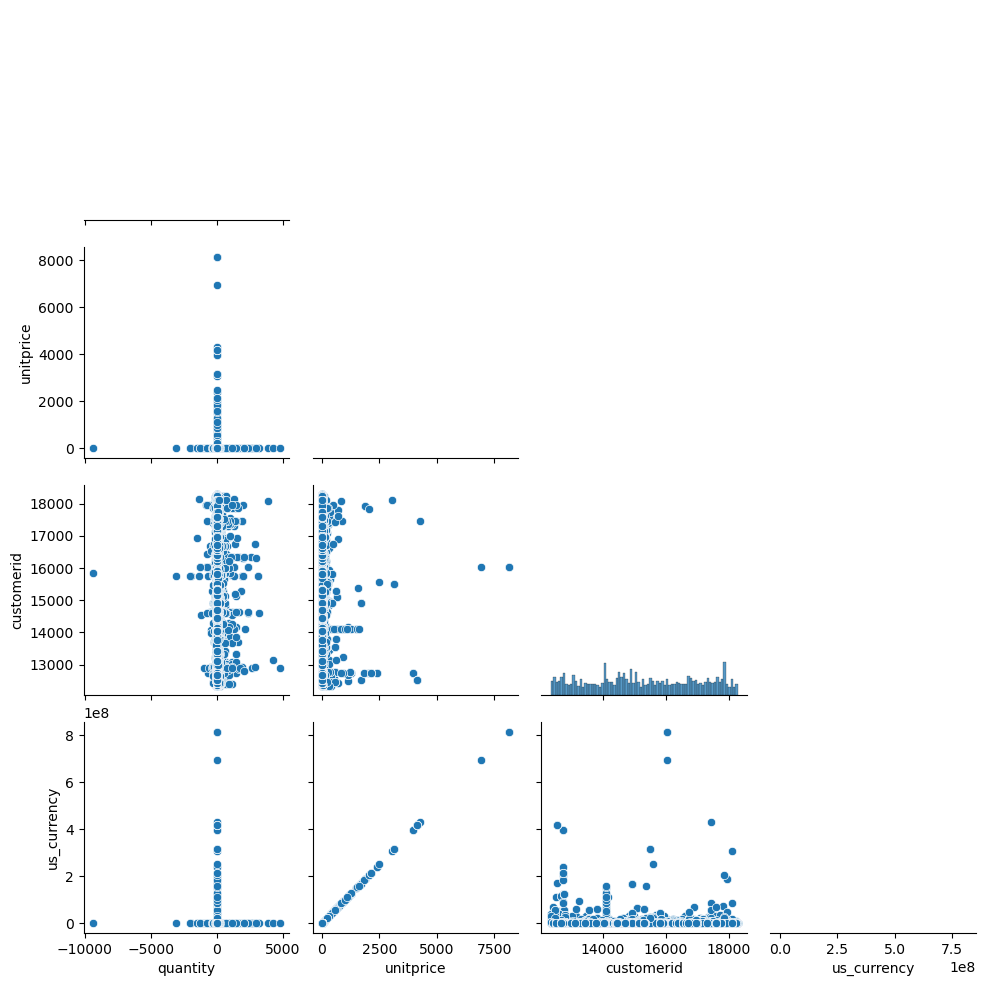

In [48]:
sns.pairplot(data = df, corner=True)